<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Intro_to_Statistic_in_Python/More_Distributions_and_the_Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, **normal distribution**. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the **Poisson**, **exponential**, and **t-distributions** to your repertoire.

**Big Question**

**WHAT is normal distrubtion?**

**WHAT are the cases can call normal distribution?**

**WHY we nedd noraml distribution?**

**WHERE could we apply normal distribution?**

## Import

In [23]:
# Importing numpy, pandas and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#
from scipy.stats import norm

# Importing the course datasets from github
# paste Raw URL from github
deals_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/amir_deals.csv"

amir_deals = pd.read_csv(deals_url)

amir_deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


## **The Noraml Distribution**


### Exercise - **Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

Both `pandas` as `pd` and `matplotlib.pyplot` as `plt` are loaded and `amir_deals` is available.

**Instructions**

* Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

* Question:
Which probability distribution do the sales amounts most closely follow?

Answer: Normal distribution

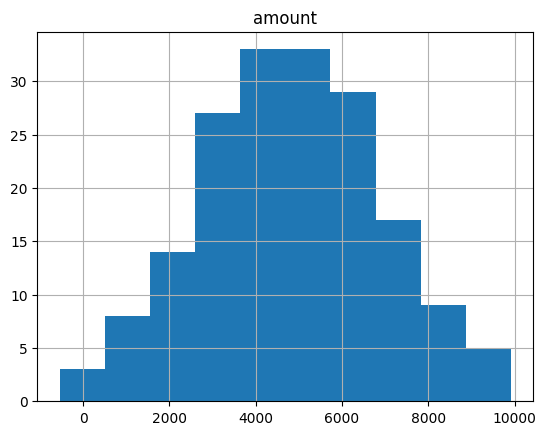

In [3]:
# Histogram of amount with 10 bins and show plot
amir_deals.hist(column= 'amount', bins=10)
plt.show()

In [4]:
# amir_deals['amount'].hist(bins= 10) not the best approach

In [5]:
# amir_deals.hist('amount',bins= 10) not the best approcah

### Exercise - **Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

`norm` from `scipy.stats` is imported as well as `pandas` as `pd`. The DataFrame `amir_deals` is loaded.

**Instructions**

* What's the probability of Amir closing a deal worth less than 7500?

* What's the probability of Amir closing a deal worth more than 1000?

* What's the probability of Amir closing a deal worth between 3000 and 7000?

* What amount will 25% of Amir's sales be less than?

In [6]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


In [7]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


In [8]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


In [9]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


Nifty normal distribution usage! You know that you can count on **Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02**. This information could be useful in making company-wide sales projections.

### Exercise - **Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame, which has already been created for you.

In addition, `norm` from `scipy.stats`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt` are loaded.

**Instructions**

* Currently, Amir's average sale amount is 5000. Calculate what his new average amount will be if it increases by 20% and store this in `new_mean`.
* Amir's current standard deviation is 2000. Calculate what his new standard deviation will be if it increases by 30% and store this in  `new_sd`.
* Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of  `new_mean` and a standard deviation of  `new_sd`.
* Plot the distribution of the `new_sales` amounts using a histogram and show the plot.

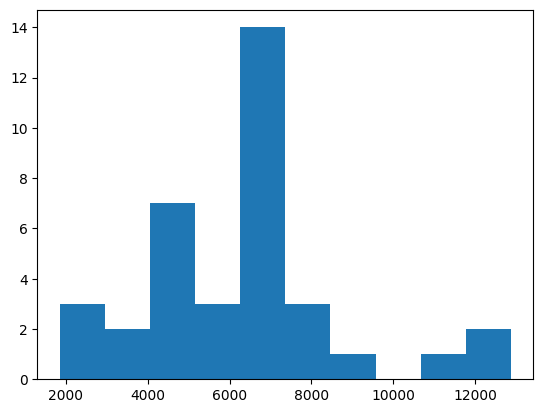

In [10]:
# Calculate new average amount
new_mean = 5000 * (1+0.2)

# Calculate new standard deviation
new_sd = 2000 * (1+0.3)

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### Exercise - **Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of 5000 and a standard deviation of 2000, and Amir's predicted amounts in next quarter's market have a mean of 6000 and a standard deviation of 2600.

`norm` from `scipy.stats` is imported.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [11]:
#  Amir's current sales
1 - norm.cdf(1000,5000,2000)

0.9772498680518208

In [12]:
# next quarter's sales
1 - norm.cdf(1000,6000,2600)

0.9727648049862613

Great work! In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.

## **The Central Limit Theorem**

### Dash App Demo

**Install Dependencies**

In [13]:
!pip install dash numpy plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


**Import Libraries & Define Functions**

In [14]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
import random

def generate_samples(n_samples, dist_type, summary_stat):
    print(f"Generating {n_samples} samples from {dist_type} distribution with {summary_stat} statistic")

    if dist_type == 'discrete uniform':
        samples = [np.random.randint(0, 11, 30) for _ in range(n_samples)]
    elif dist_type == 'continuous uniform':
        samples = [np.random.uniform(0, 10, 30) for _ in range(n_samples)]
    elif dist_type == 'normal':
        samples = [np.random.normal(0, 1, 30) for _ in range(n_samples)]
    elif dist_type == 'binomial':
        samples = [np.random.binomial(10, 0.4, 30) for _ in range(n_samples)]
    elif dist_type == 'poisson':
        samples = [np.random.poisson(2, 30) for _ in range(n_samples)]

    print("Sample generation complete.")

    if summary_stat == 'mean':
        stat_values = [np.mean(sample) for sample in samples]
    elif summary_stat == 'median':
        stat_values = [np.median(sample) for sample in samples]
    elif summary_stat == 'standard deviation':
        stat_values = [np.std(sample) for sample in samples]

    print(f"Computed {summary_stat} for all samples.")
    return stat_values

def generate_distribution_chart(distribution):
    sample_x = np.linspace(0, 10, 100)
    sample_y = np.ones_like(sample_x) / len(sample_x) if distribution in ['continuous uniform', 'discrete uniform'] else np.exp(-((sample_x - 0) ** 2) / 2) / np.sqrt(2 * np.pi) if distribution == 'normal' else np.random.binomial(10, 0.4, 100) / 10 if distribution == 'binomial' else np.random.poisson(2, 100) / 10

    dist_fig = go.Figure()
    dist_fig.add_trace(go.Bar(x=sample_x, y=sample_y, marker=dict(color='navy')))
    dist_fig.update_layout(
        title=f"{distribution.capitalize()} Distribution",
        xaxis_title="Value",
        yaxis_title="Probability",
        bargap=0.2,
        xaxis=dict(range=[0, 10]),
        yaxis=dict(range=[0, 0.3])
    )
    return dist_fig


**Initialize the Dash App**

In [15]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Exploring the Central Limit Theorem"),

    html.Label("Number of samples:"),
    dcc.Slider(
        id='num_samples',
        min=10,
        max=10000,
        marks={10: '10', 100: '100', 1000: '1000', 5000: '5000', 10000: '10000'},
        step=10,
        value=100
    ),

    html.Label("Summary statistic:"),
    dcc.Dropdown(
        id='summary_stat',
        options=[
            {'label': 'Mean', 'value': 'mean'},
            {'label': 'Median', 'value': 'median'},
            {'label': 'Standard Deviation', 'value': 'standard deviation'}
        ],
        value='mean'
    ),

    html.Label("Distribution:"),
    dcc.Dropdown(
        id='distribution',
        options=[
            {'label': 'Discrete Uniform', 'value': 'discrete uniform'},
            {'label': 'Continuous Uniform', 'value': 'continuous uniform'},
            {'label': 'Normal', 'value': 'normal'},
            {'label': 'Binomial', 'value': 'binomial'},
            {'label': 'Poisson', 'value': 'poisson'}
        ],
        value='discrete uniform'
    ),

    html.Div(id='distribution_info'),
    dcc.Graph(id='distribution_chart'),
    dcc.Graph(id='histogram')
])


**Define Callbacks**

In [16]:
@app.callback(
    Output('histogram', 'figure'),
    Output('distribution_info', 'children'),
    Input('num_samples', 'value'),
    Input('summary_stat', 'value'),
    Input('distribution', 'value')
)
def update_graph(num_samples, summary_stat, distribution):
    print(f"Updating graph with {num_samples} samples, {summary_stat} statistic, {distribution} distribution.")
    stat_values = generate_samples(num_samples, distribution, summary_stat)

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=stat_values, nbinsx=30, marker=dict(color='navy')))
    fig.update_layout(
        title=f"Sampling distribution of {num_samples} samples ({summary_stat.capitalize()}) from {distribution.capitalize()} distribution",
        xaxis_title=summary_stat.capitalize(),
        yaxis_title="Count",
        bargap=0.2
    )

    distribution_explanations = {
        'discrete uniform': "Discrete Uniform: min=0, max=10",
        'continuous uniform': "Continuous Uniform: min=0, max=10",
        'normal': "Normal: μ=0, σ=1",
        'binomial': "Binomial: n=10, p=0.4",
        'poisson': "Poisson: λ=2"
    }

    info_text = f"{distribution.capitalize()} Distribution: {distribution_explanations.get(distribution, '')}"

    print("Graph updated successfully.")
    return fig, info_text

@app.callback(
    Output('distribution_chart', 'figure'),
    Input('distribution', 'value')
)
def update_distribution_chart(distribution):
    return generate_distribution_chart(distribution)


### Run the Dash App Demo

In [17]:
if __name__ == '__main__':
    print("Starting Dash application...")
    app.run_server(mode='inline', debug=True)


Starting Dash application...


<IPython.core.display.Javascript object>

### Exercise - **Visualizing sampling distributions**

from above, try creating sampling distributions of different summary statistics from samples of different distributions. Which distribution does the central limit theorem not apply to?


* Discrete uniform distribution

* Continuous uniform distribution

* Binomial distribution

* All of the above

* None of the above ✅

Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.



### Exercise - **The CLT in action**

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

**Instructions 1/4**

* Create a histogram of the `num_users` column of `amir_deals` and show the plot.

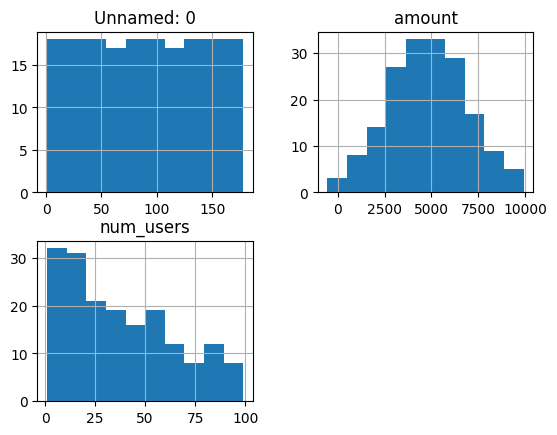

In [18]:
num_users = amir_deals['num_users']

amir_deals.hist()
plt.show()

**Instructions 2/4**

* Set the seed to `104`.
* Take a sample of size `20` with replacement from the `num_users` column of `amir_deals`, and take the mean.

In [19]:
# Set seed to 104
np.random.seed(104)

# sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20,replace=True) # samp_20 = np.random.choice(amir_deals['num_users'],20,replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


**Instructions 3/4**

* Repeat this 100 times using a `for` loop and store as `sample_means`. This will take 100 different samples and calculate the mean of each.



In [20]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20,replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


**Instructions 4/4**

* Convert `sample_means` into a `pd.Series`, create a histogram of the `sample_means`, and show the plot.

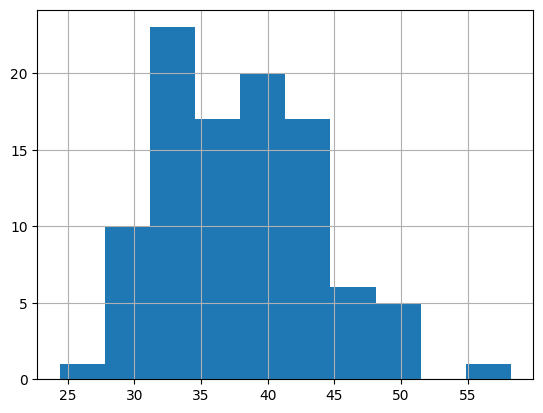

In [21]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

Fabulous job! You've just seen the central limit thorem at work. Even though the distribution of `num_users` is not normal, the distribution of its sample means resembles the normal distribution.

### Exercise - **The mean of means**

You want to know what the average number of users (`num_users`) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

`amir_deals` is available and the user data for all the company's deals is available in `all_deals`. Both `pandas` as `pd` and `numpy` as `np` are loaded.

**Instructions**

* Set the random seed to 321.
* Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
* Print the mean of sample_means.
* Print the mean of the num_users column of amir_deals.



In [1]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace =True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

NameError: name 'np' is not defined

Magnificent mean calculation! Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!

## **The Poisson distribution**

### Exercise - **Identifying lambda**

### Exercise - **Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

**Instructions**

* Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

* Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

* What's the probability that Amir responds to 2 or fewer leads in a day?

* What's the probability that Amir responds to more than 10 leads in a day?

In [2]:
# Import poisson from scipy.stats
from scipy.stats import poisson

In [3]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


In [4]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [5]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


In [6]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


 Note that if you provide `poisson.pmf()` or `poisson.cdf()`with a non-integer, it throws an error since the Poisson distribution only applies to integers.

## **More probability distributions**

### Exercise - **Distribution dragging and dropping**

By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.




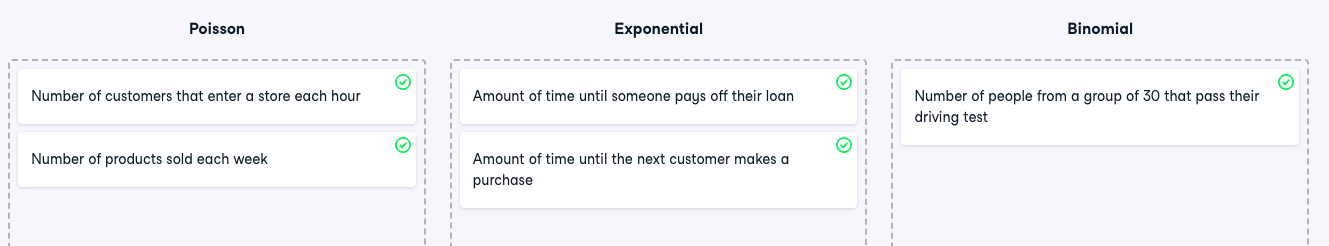

### Exercise - **Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

**Instructions**

* Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?

* What's the probability it takes Amir more than 4 hours to respond to a lead?

* What's the probability it takes Amir 3-4 hours to respond to a lead?



In [7]:
# Import expon from scipy.stats
from scipy.stats import expon

In [8]:
# Print probability response takes < 1 hour
print(expon.cdf(1, scale = 2.5))

0.3296799539643607


In [9]:
# Print probability response takes > 4 hours
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale = 2.5))

0.20189651799465536


In [10]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale= 2.5) - expon.cdf(3, scale= 2.5))

0.09929769391754684


There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.

### The t-distribution

Which statement is **not** true regarding the t-distribution?


* The t-distribution has thicker tails than the normal distribution. ✅

* A t-distribution with high degrees of freedom resembles the normal distribution. ✅

* The number of degrees of freedom affects the distribution's variance. ✅

* The t-distribution is skewed. ❌

The t-distribution is not skewed, just like the normal distribution, but it does have thicker tails and higher variance than the normal distribution.